In [3]:
import pandas as pd
import requests
import hashlib
from time import sleep

passwords = [
    "akhdbd", "abc28849174", "Abcabc2008", "abb20030101!",
    "xxxxxxxx1111111", "ak¥yhsξhsg7#827636?736637?", "abc123",
    "qwerasdfzxcv123", "aaddeeQQ098", "aCyy2727000322", "Naive1984.456456",
    "xcfdsb1996", "123abc", "yzgdgs123", "yyy12345678", "123456alpha",
    "20000505x x", "abc1245A&", "whataniceday.0912", "Ab1c3d",
    "NAME+MMDD", "abdhshsh", "Dob+name+123…", "12345678",
    "helloworldDH126!!", "abc8209ksm", "1Sherkxoualw190@-", "Abc@123456.yyy"
]
def check_pwned(password):
    sha1_pw = hashlib.sha1(password.encode('utf-8')).hexdigest().upper()
    prefix, suffix = sha1_pw[:5], sha1_pw[5:]
    url = f'https://api.pwnedpasswords.com/range/{prefix}'
    res = requests.get(url)
    if res.status_code != 200:
        return -1
    hashes = (line.split(':') for line in res.text.splitlines())
    for h, count in hashes:
        if h == suffix:
            return int(count)
    return 0
results = []
for pw in passwords:
    count = check_pwned(pw)
    print(f"{pw}: {'Leaked' if count > 0 else 'Safe'} ({count})")
    results.append({
        "Password": pw,
        "Leaked": count > 0,
        "Times Found": count
    })
    sleep(1.5)
df = pd.DataFrame(results)
df

akhdbd: Safe (0)
abc28849174: Safe (0)
Abcabc2008: Safe (0)
abb20030101!: Safe (0)
xxxxxxxx1111111: Safe (0)
ak¥yhsξhsg7#827636?736637?: Safe (0)
abc123: Leaked (6019997)
qwerasdfzxcv123: Leaked (4673)
aaddeeQQ098: Safe (0)
aCyy2727000322: Safe (0)
Naive1984.456456: Safe (0)
xcfdsb1996: Safe (0)
123abc: Leaked (1529514)
yzgdgs123: Safe (0)
yyy12345678: Leaked (1)
123456alpha: Leaked (230)
20000505x x: Safe (0)
abc1245A&: Safe (0)
whataniceday.0912: Safe (0)
Ab1c3d: Safe (0)
NAME+MMDD: Safe (0)
abdhshsh: Safe (0)
Dob+name+123…: Safe (0)
12345678: Leaked (40744073)
helloworldDH126!!: Safe (0)
abc8209ksm: Safe (0)
1Sherkxoualw190@-: Safe (0)
Abc@123456.yyy: Safe (0)


,Password,Leaked,Times Found
0,akhdbd,False,0
1,abc28849174,False,0
2,Abcabc2008,False,0
3,abb20030101!,False,0
4,xxxxxxxx1111111,False,0
5,ak¥yhsξhsg7#827636?736637?,False,0
6,abc123,True,6019997
7,qwerasdfzxcv123,True,4673
8,aaddeeQQ098,False,0
9,aCyy2727000322,False,0


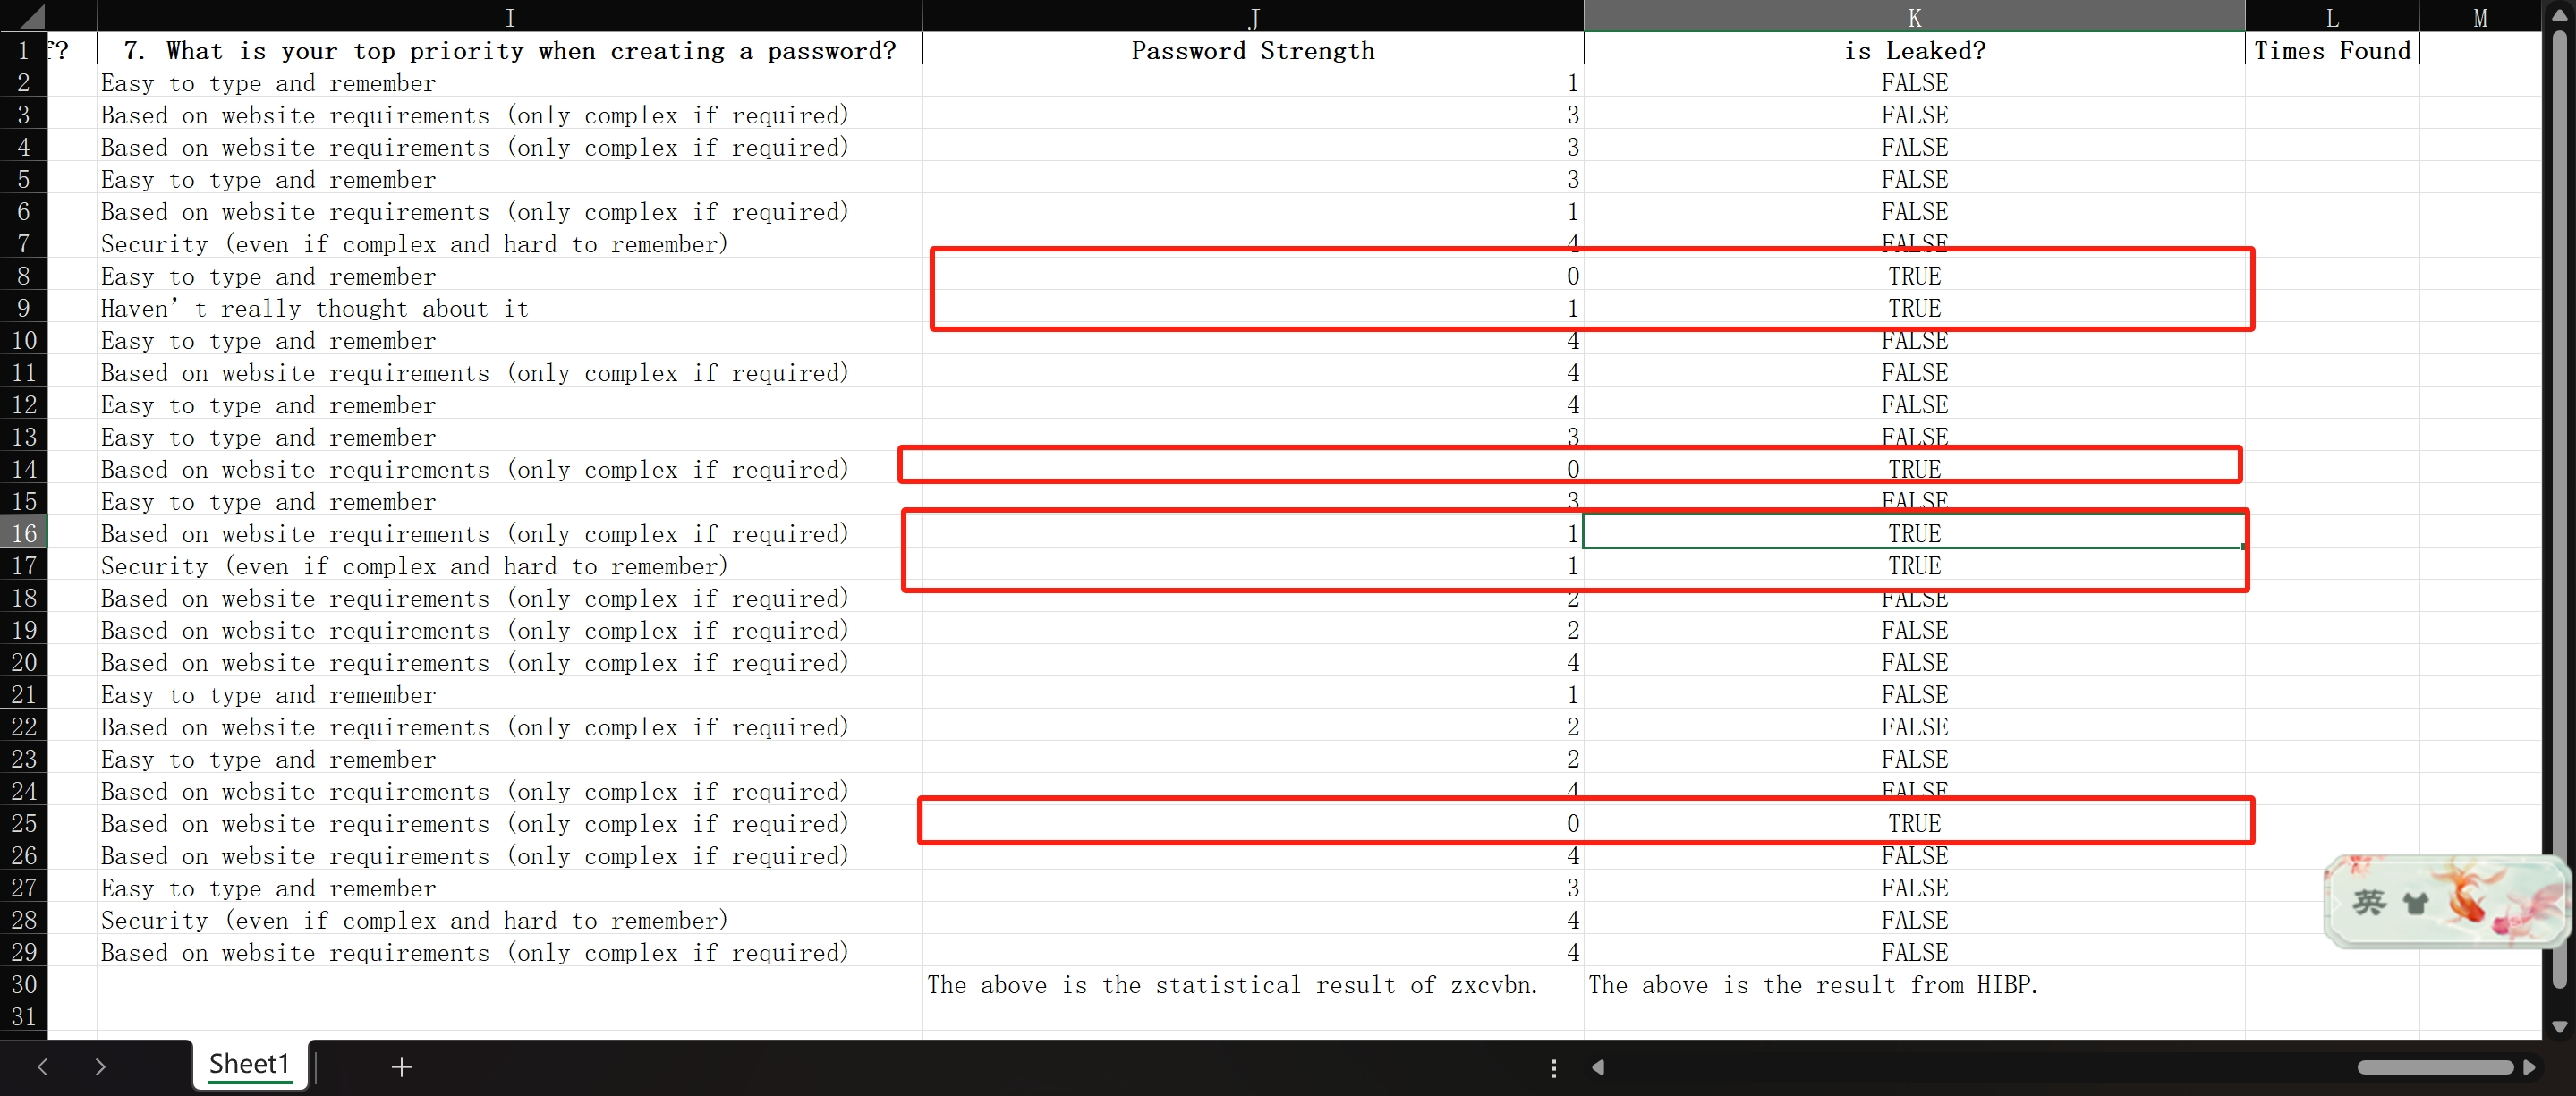

According to the zxcvbn results, all the passwords that were found in data breaches had a strength score of 0 or 1. This shows that weak passwords are more likely to be compromised. Some very weak ones like “akhdbd” and “xxxxxxxx1111111” didn’t show up in the breach list, but I think they just haven’t been caught yet, and this reflects what we learned in Week 4: technical tools like HIBP are helpful but not foolproof, and relying solely on breach history can create a false sense of security. So I think using breach history as a safety check can be helpful, but it’s not enough. Security tools must be paired with actual behavioral change to be effective.
Many students still have low awareness of password risks, and most people only start caring about security after something goes wrong.That’s why password education is so important. We should build safer habits before problems happen, not after.